<a href="https://colab.research.google.com/github/Collin-Campbell/BuildWeek1/blob/master/Collin_BuildWeek_Unit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Pulled data from Kaggle:
# https://www.kaggle.com/open-powerlifting/powerlifting-database

import pandas as pd
import numpy as np

df = pd.read_csv('openpowerlifting.csv')

print(df.shape)
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1423354, 37)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,NaN,105.0,45.0,50.0,55.0,NaN,55.0,110.0,120.0,130.0,NaN,130.0,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,NaN,120.0,55.0,62.5,67.5,NaN,67.5,130.0,140.0,145.0,NaN,145.0,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,NaN,32.5,NaN,NaN,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,NaN,105.0,67.5,72.5,-75.0,NaN,72.5,132.5,-140.0,-140.0,NaN,132.5,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,NaN,140.0,70.0,75.0,80.0,NaN,80.0,150.0,160.0,170.0,NaN,170.0,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [52]:
df.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

In [53]:
df = df.drop(['Name', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 
              'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 
              'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 
              'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 
              'TotalKg', 'Place', 'McCulloch', 'Glossbrenner', 'IPFPoints', 
              'Tested', 'Country'], axis=1)

# Dropped unneeded columns and columns with NaNs.

In [54]:
df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,F,B,Raw,40.0,40-44,F-OR,38.56,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [55]:
df = df.dropna()

# Dropped all rows with NaN values.

In [56]:
df.isnull().sum()

Sex            0
Event          0
Equipment      0
Age            0
AgeClass       0
Division       0
Wilks          0
Federation     0
Date           0
MeetCountry    0
MeetState      0
MeetName       0
dtype: int64

In [57]:
# Drop all rows that are not SBD for Event.

df = df[df.Event == 'SBD']

In [58]:
df = df.reset_index(drop=True)

In [59]:
print(df.shape)
df.head()

# Data is cleaned.

(273373, 12)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,F,SBD,Wraps,37.0,35-39,F-OR,354.74,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [ ]:
# Research question: 
# Due to a combination of equatorial bulge and the effects of the surface
# centrifugal force due to Earth's rotation, we know that gravity is stronger
# at the poles than at the Equator.  With this in mind, do power-
# lifters benefit from this information?  Meaning, are they able to lift 
# more (and score better) at locations closer to the Equator?

In [61]:
print(df['MeetCountry'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df['MeetCountry'].value_counts()

USA            223631
Australia       21520
Canada          13329
New Zealand      6715
Germany          4833
Russia           2743
Netherlands       271
Mexico            153
India             118
Brazil             60
Name: MeetCountry, dtype: int64

In [ ]:
df['MeetState'].value_counts()

TX     36912
CA     28048
FL     15164
OH     10546
PA      8864
       ...  
SH        10
JA         9
ZE         7
GR         4
TKI        2
Name: MeetState, Length: 109, dtype: int64

In [ ]:
test_df = df.copy()

In [ ]:
pd.set_option('display.max_rows', None)

test_df.groupby(['MeetCountry', 'MeetState']).size().reset_index(name='Counts')

# 116 total different meet locations.  I need to add a column for each location:
# Distance from Equator.

,MeetCountry,MeetState,Counts
0,Australia,ACT,814
1,Australia,NSW,4985
2,Australia,NT,166
3,Australia,QLD,5490
4,Australia,SA,543
5,Australia,TAS,625
6,Australia,VIC,6706
7,Australia,WA,2191
8,Brazil,SP,60
9,Canada,AB,2098


In [ ]:
df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,F,SBD,Wraps,37.0,35-39,F-OR,354.74,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [ ]:
def n_or_s(df):
  if df['MeetCountry'] == 'Australia':
    return 'S'
  if df['MeetCountry'] == 'Brazil':
    return 'S'
  if df['MeetCountry'] == 'Canada':
    return 'N'
  if df['MeetCountry'] == 'Germany':
    return 'N'
  if df['MeetCountry'] == 'India':
    return 'N'
  if df['MeetCountry'] == 'Mexico':
    return 'N'
  if df['MeetCountry'] == 'Netherlands':
    return 'N'
  if df['MeetCountry'] == 'New Zealand':
    return 'S'
  if df['MeetCountry'] == 'Russia':
    return 'N'
  if df['MeetCountry'] == 'USA':
    return 'N'
  else: 
    return 'NaN'

In [ ]:
df['N_or_S'] = df.apply(n_or_s, axis=1)

In [ ]:
print(df.shape)
df.head()

(273373, 13)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
2,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
3,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
4,F,SBD,Wraps,37.0,35-39,F-OR,354.74,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S


In [ ]:
df.isnull().sum()

Sex            0
Event          0
Equipment      0
Age            0
AgeClass       0
Division       0
Wilks          0
Federation     0
Date           0
MeetCountry    0
MeetState      0
MeetName       0
N_or_S         0
dtype: int64

In [ ]:
def latitude(df):

# Australia
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'ACT'):
    return 35
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'NSW'):
    return 31
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'NT'):
    return 20
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'QLD'):
    return 21
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'SA'):
    return 30
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'TAS'):
    return 41
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'VIC'):
    return 37
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'WA'):
    return 28

# Brazil
  if (df['MeetCountry'] == 'Brazil' and df['MeetState'] == 'SP'):
    return 24

# Canada
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'AB'):
    return 54
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'BC'):
    return 54
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'MB'):
    return 54
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'NB'):
    return 47
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'NL'):
    return 53
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'NS'):
    return 45
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'PE'):
    return 47
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'ON'):
    return 56
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'QC'):
    return 47
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'SK'):
    return 53

# Germany
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BB'):
    return 52
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BE'):
    return 53
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BW'):
    return 49
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BY'):
    return 49
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'HE'):
    return 51
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'HH'):
    return 54
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'MV'):
    return 54
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'NI'):
    return 53
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'NW'):
    return 51
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'RP'):
    return 50
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'SH'):
    return 54
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'SN'):
    return 51
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'ST'):
    return 52
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'TH'):
    return 51
  
# India
  if (df['MeetCountry'] == 'India' and df['MeetState'] == 'DL'):
    return 29
  if (df['MeetCountry'] == 'India' and df['MeetState'] == 'MH'):
    return 20
  if (df['MeetCountry'] == 'India' and df['MeetState'] == 'WB'):
    return 23

# Mexico
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'BC'):
    return 31
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'CH'):
    return 29
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'CO'):
    return 27
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'DF'):
    return 19
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'GT'):
    return 21
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'HG'):
    return 20
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'JA'):
    return 21
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'SI'):
    return 25

# Netherlands
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'GE'):
    return 52
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'GR'):
    return 53
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'NB'):
    return 51
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'NH'):
    return 53
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'ZE'):
    return 51
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'ZH'):
    return 52

# New Zealand
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'AKL'):
    return 37
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'BOP'):
    return 37
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'CAN'):
    return 44
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'GIS'):
    return 39
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'HKB'):
    return 40
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'MWT'):
    return 40
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'NTL'):
    return 35
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'OTA'):
    return 45
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'STL'):
    return 46
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'TAS'):
    return 41
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'TKI'):
    return 39
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'WGN'):
    return 41
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'WKO'):
    return 38

# Russia
  if (df['MeetCountry'] == 'Russia' and df['MeetState'] == 'ME'):
    return 56
  if (df['MeetCountry'] == 'Russia' and df['MeetState'] == 'MOW'):
    return 56

# USA
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AK'):
    return 64
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AL'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AR'):
    return 35
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AZ'):
    return 34
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'CA'):
    return 37
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'CO'):
    return 40
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'CT'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'DC'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'DE'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'FL'):
    return 28
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'GA'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'HI'):
    return 20
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'IA'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'ID'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'IL'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'IN'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'KS'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'KY'):
    return 38
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'LA'):
    return 31
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MA'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MD'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'ME'):
    return 45
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MI'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MN'):
    return 47
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MO'):
    return 38
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MS'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MT'):
    return 47
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NC'):
    return 36
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'ND'):
    return 48
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NE'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NH'):
    return 43
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NJ'):
    return 40
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NM'):
    return 35
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NV'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NY'):
    return 43
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'OH'):
    return 40
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'OK'):
    return 35
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'OR'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'PA'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'RI'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'SC'):
    return 34
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'SD'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'TN'):
    return 36
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'TX'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'UT'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'VA'):
    return 37
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'VT'):
    return 45
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WA'):
    return 48
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WI'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WV'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WY'):
    return 43

# Other
  else: 
    return 'NaN'

In [50]:
df['Latitude'] = df.apply(latitude, axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,105.0,45.0,50.0,55.0,55.0,110.0,120.0,130.0,130.0,290.0,4,324.16,324.16,286.42,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,120.0,55.0,62.5,67.5,67.5,130.0,140.0,145.0,145.0,332.5,2,378.07,378.07,334.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
2,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,105.0,67.5,72.5,-75.0,72.5,132.5,-140.0,-140.0,132.5,310.0,3,345.61,345.61,305.37,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
3,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,140.0,70.0,75.0,80.0,80.0,150.0,160.0,170.0,170.0,390.0,3,321.25,338.91,274.56,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
4,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,135.0,142.5,142.5,72.5,77.5,82.5,82.5,125.0,135.0,145.0,145.0,370.0,5,354.74,354.74,312.20,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37


In [ ]:
import matplotlib.pyplot as plt

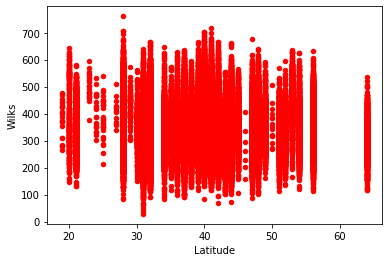

In [ ]:
df.plot(kind='scatter',x='Latitude',y='Wilks',color='red')
plt.show()

In [ ]:
df.corr()

# A very weak (-0.07) negative linear relationship between Latitude vs. Wilks

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,Latitude
Age,1.000000,0.106892,-0.038420,-0.035188,0.007261,-0.015625,0.025907,-0.001499,-0.006563,0.044656,0.009905,0.012669,-0.001298,-0.010795,0.002666,-0.034031,0.144568,-0.045545,-0.004766
BodyweightKg,0.106892,1.000000,0.232367,0.193029,0.105125,0.636819,0.321077,0.191693,0.008461,0.642363,0.358144,0.182754,-0.015431,0.623612,0.652864,0.195657,0.169301,0.238560,0.008102
Squat1Kg,-0.038420,0.232367,1.000000,0.104152,0.000926,0.396302,0.211051,0.138482,0.034245,0.349046,0.242110,0.112471,-0.015456,0.377205,0.388083,0.325265,0.292735,0.347333,-0.013921
Squat2Kg,-0.035188,0.193029,0.104152,1.000000,0.081168,0.276127,0.155520,0.135295,0.061270,0.235971,0.166462,0.139842,0.050620,0.264790,0.269056,0.196398,0.171740,0.215420,-0.007069
Squat3Kg,0.007261,0.105125,0.000926,0.081168,1.000000,0.099621,0.053913,0.102951,0.093721,0.068477,0.054325,0.097499,0.115580,0.079551,0.086681,0.033287,0.032113,0.041503,0.000208
Best3SquatKg,-0.015625,0.636819,0.396302,0.276127,0.099621,1.000000,0.456675,0.253794,0.015076,0.920979,0.523933,0.215276,-0.118679,0.919851,0.979274,0.796785,0.749367,0.851800,-0.041762
Bench1Kg,0.025907,0.321077,0.211051,0.155520,0.053913,0.456675,1.000000,0.091820,-0.048255,0.488024,0.268407,0.134172,-0.027002,0.461744,0.481089,0.363055,0.338597,0.398502,-0.003234
Bench2Kg,-0.001499,0.191693,0.138482,0.135295,0.102951,0.253794,0.091820,1.000000,0.079468,0.294891,0.161060,0.117067,0.050155,0.262997,0.276325,0.203727,0.191901,0.224872,-0.011857
Bench3Kg,-0.006563,0.008461,0.034245,0.061270,0.093721,0.015076,-0.048255,0.079468,1.000000,0.045511,0.010595,0.055305,0.090142,0.011477,0.022855,0.037477,0.043468,0.033724,-0.015484
Best3BenchKg,0.044656,0.642363,0.349046,0.235971,0.068477,0.920979,0.488024,0.294891,0.045511,1.000000,0.506122,0.220316,-0.088828,0.894163,0.961517,0.720245,0.681752,0.793309,-0.026298


In [ ]:
Lat_Wilks_df = df.groupby('Latitude', as_index=False).Wilks.mean()

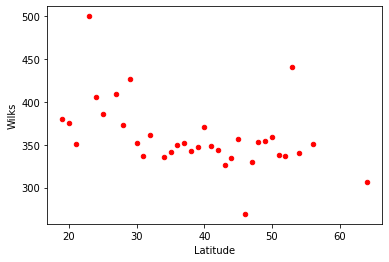

In [ ]:
Lat_Wilks_df.plot(kind='scatter',x='Latitude',y='Wilks',color='red')
plt.show()

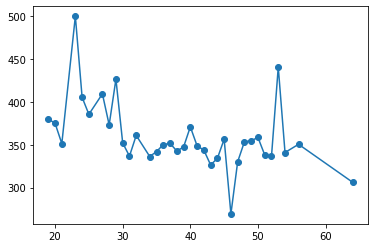

In [ ]:
plt.plot(Lat_Wilks_df['Latitude'], Lat_Wilks_df['Wilks'], '-o')
plt.show()

In [ ]:
N_only_df = df[df.N_or_S == 'N']

In [ ]:
print(N_only_df.shape)
N_only_df.head()

(102980, 33)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
5286,Hamidreza Jadali,M,SBD,Raw,20.5,20-23,Juniors,69.5,74,110.0,120.0,130.0,130.0,80.0,85.0,90.0,90.0,120.0,135.0,145.0,145.0,365.0,1,275.04,280.54,266.55,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
5287,Rustam Hadschi,M,SBD,Raw,18.0,18-19,Youth A,69.4,74,135.0,145.0,155.0,155.0,90.0,95.0,100.0,100.0,160.0,170.0,175.0,175.0,430.0,1,324.38,343.84,314.38,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
5288,Tim Hajo Paltinat,M,SBD,Raw,17.5,18-19,Youth A,67.8,74,85.0,95.0,107.5,107.5,70.0,77.5,80.0,80.0,110.0,125.0,135.0,135.0,322.5,2,247.77,262.64,240.30,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
5289,Jan Schnoor,M,SBD,Raw,25.0,24-34,Open,125.3,120+,225.0,245.0,255.0,255.0,155.0,165.0,172.5,172.5,255.0,275.0,-282.5,275.0,702.5,1,400.12,400.12,381.08,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
5290,Frank Hoyer,M,SBD,Raw,37.5,35-39,Open,106.7,120,170.0,180.0,-185.0,180.0,140.0,150.0,-155.0,150.0,200.0,210.0,220.0,220.0,550.0,2,326.85,326.85,313.46,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54


In [ ]:
N_only_df.corr()

# Negative linear correlation is a bit stronger with only Northern Hemisphere values

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,Latitude
Age,1.000000,0.121459,-0.031098,-0.031490,0.009672,0.000682,0.036855,0.003998,-0.009007,0.065700,0.018262,0.018483,-0.002869,0.006275,0.021178,-0.020654,0.151010,-0.030681,0.020280
BodyweightKg,0.121459,1.000000,0.231093,0.188766,0.102538,0.631768,0.319257,0.183395,-0.000063,0.641803,0.353032,0.178234,-0.016198,0.620128,0.649461,0.198469,0.172319,0.239044,0.025241
Squat1Kg,-0.031098,0.231093,1.000000,0.100228,-0.002915,0.392485,0.210782,0.136681,0.028112,0.347416,0.241832,0.108861,-0.015121,0.376307,0.385717,0.323794,0.291687,0.344878,-0.007255
Squat2Kg,-0.031490,0.188766,0.100228,1.000000,0.078303,0.267913,0.149081,0.131634,0.055857,0.229854,0.162962,0.138488,0.051113,0.259518,0.262154,0.190724,0.166122,0.209030,-0.001660
Squat3Kg,0.009672,0.102538,-0.002915,0.078303,1.000000,0.091683,0.051557,0.101072,0.092106,0.063929,0.050746,0.096747,0.114965,0.074840,0.080585,0.027085,0.026350,0.035329,0.009002
Best3SquatKg,0.000682,0.631768,0.392485,0.267913,0.091683,1.000000,0.454531,0.243227,0.002492,0.923160,0.518038,0.207087,-0.124997,0.918899,0.979474,0.803706,0.757147,0.855669,-0.047137
Bench1Kg,0.036855,0.319257,0.210782,0.149081,0.051557,0.454531,1.000000,0.085372,-0.054621,0.487019,0.267487,0.129637,-0.026754,0.461342,0.479815,0.364270,0.339961,0.398230,-0.003502
Bench2Kg,0.003998,0.183395,0.136681,0.131634,0.101072,0.243227,0.085372,1.000000,0.074440,0.285963,0.155714,0.112659,0.048829,0.253259,0.266227,0.197466,0.186442,0.217316,-0.013233
Bench3Kg,-0.009007,-0.000063,0.028112,0.055857,0.092106,0.002492,-0.054621,0.074440,1.000000,0.034847,0.003017,0.051312,0.087680,-0.000608,0.010677,0.028258,0.035898,0.023922,-0.010994
Best3BenchKg,0.065700,0.641803,0.347416,0.229854,0.063929,0.923160,0.487019,0.285963,0.034847,1.000000,0.501762,0.215100,-0.093415,0.894215,0.962485,0.728117,0.689515,0.797226,-0.041914


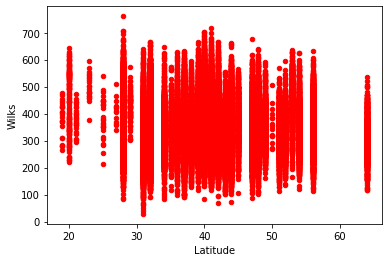

In [ ]:
N_only_df.plot(kind='scatter',x='Latitude',y='Wilks',color='red')
plt.show()

In [ ]:
N_only_Lat_Wilks_df = N_only_df.groupby('Latitude', as_index=False).Wilks.mean()

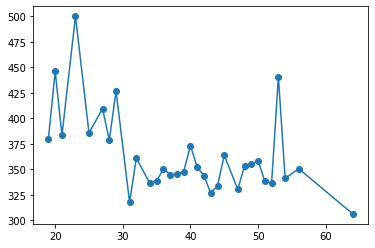

In [ ]:
plt.plot(N_only_Lat_Wilks_df['Latitude'], N_only_Lat_Wilks_df['Wilks'], '-o')
plt.show()

In [ ]:
S_only_df = df[df.N_or_S == 'S']

In [ ]:
print(S_only_df.shape)
S_only_df.head()

(23549, 33)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,105.0,45.0,50.0,55.0,55.0,110.0,120.0,130.0,130.0,290.0,4,324.16,324.16,286.42,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,120.0,55.0,62.5,67.5,67.5,130.0,140.0,145.0,145.0,332.5,2,378.07,378.07,334.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
2,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,105.0,67.5,72.5,-75.0,72.5,132.5,-140.0,-140.0,132.5,310.0,3,345.61,345.61,305.37,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
3,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,140.0,70.0,75.0,80.0,80.0,150.0,160.0,170.0,170.0,390.0,3,321.25,338.91,274.56,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
4,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,135.0,142.5,142.5,72.5,77.5,82.5,82.5,125.0,135.0,145.0,145.0,370.0,5,354.74,354.74,312.20,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37


In [ ]:
S_only_df.corr()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,Latitude
Age,1.000000,0.029349,-0.083120,-0.059241,-0.008597,-0.102238,-0.031722,-0.032334,-0.000912,-0.061012,-0.041648,-0.021226,0.005941,-0.104918,-0.094946,-0.108422,0.118293,-0.126393,-0.002315
BodyweightKg,0.029349,1.000000,0.236476,0.210931,0.115045,0.662930,0.331762,0.230851,0.044743,0.653940,0.380499,0.200973,-0.012170,0.638569,0.670937,0.183516,0.159405,0.239290,-0.005923
Squat1Kg,-0.083120,0.236476,1.000000,0.121847,0.017815,0.415729,0.212782,0.146881,0.062076,0.361664,0.241089,0.128095,-0.017136,0.379838,0.400000,0.335013,0.303042,0.362706,-0.004831
Squat2Kg,-0.059241,0.210931,0.121847,1.000000,0.093368,0.316833,0.188529,0.152748,0.085209,0.270836,0.181678,0.144706,0.048470,0.288284,0.303098,0.228269,0.205417,0.251060,0.002685
Squat3Kg,-0.008597,0.115045,0.017815,0.093368,1.000000,0.137802,0.065728,0.111546,0.099818,0.093512,0.069619,0.099653,0.118349,0.099701,0.115818,0.066092,0.064284,0.074145,-0.009409
Best3SquatKg,-0.102238,0.662930,0.415729,0.316833,0.137802,1.000000,0.468101,0.307724,0.076561,0.912029,0.554407,0.254924,-0.089584,0.926232,0.978240,0.760297,0.709939,0.832351,-0.020368
Bench1Kg,-0.031722,0.331762,0.212782,0.188529,0.065728,0.468101,1.000000,0.125549,-0.016343,0.494310,0.273892,0.157109,-0.028342,0.465392,0.487939,0.356629,0.331827,0.400415,-0.003407
Bench2Kg,-0.032334,0.230851,0.146881,0.152748,0.111546,0.307724,0.125549,1.000000,0.103286,0.344218,0.187315,0.137660,0.056466,0.310550,0.327706,0.239052,0.223998,0.267026,0.008616
Bench3Kg,-0.000912,0.044743,0.062076,0.085209,0.099818,0.076561,-0.016343,0.103286,1.000000,0.103091,0.044613,0.071813,0.101318,0.065988,0.082178,0.087091,0.086859,0.086271,0.003310
Best3BenchKg,-0.061012,0.653940,0.361664,0.270836,0.093512,0.912029,0.494310,0.344218,0.103091,1.000000,0.535204,0.250437,-0.067260,0.902702,0.959276,0.675890,0.636262,0.771605,-0.011413


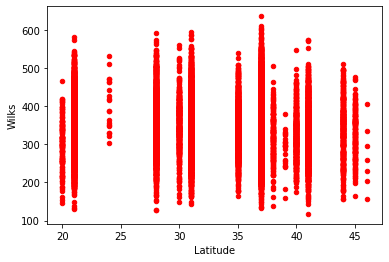

In [ ]:
S_only_df.plot(kind='scatter',x='Latitude',y='Wilks',color='red')
plt.show()

In [ ]:
S_only_Lat_Wilks_df = S_only_df.groupby('Latitude', as_index=False).Wilks.mean()

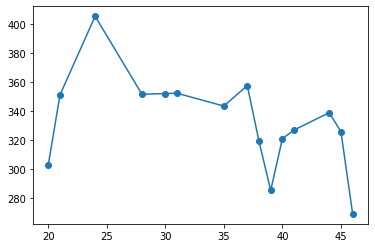

In [ ]:
plt.plot(S_only_Lat_Wilks_df['Latitude'], S_only_Lat_Wilks_df['Wilks'], '-o')
plt.show()